# Trabalho II - Análise de Dados: Sono e Estilo de Vida

## 1. Introdução

Este trabalho tem como objetivo aplicar e comparar os principais algoritmos de classificação e regressão, conforme estudado em aula, utilizando uma base de dados real para analisar a relação entre estilo de vida, saúde e qualidade do sono.

A base de dados escolhida foi a **Base 02 - Sono e Estilo de Vida**, um conjunto de dados fictício que contém informações sobre hábitos de sono, saúde e estilo de vida de 400 indivíduos.

## 2. Definição dos Problemas e Objetivos

O objetivo deste projeto é desenvolver e avaliar modelos de Machine Learning para duas tarefas distintas: uma de classificação e uma de regressão.

### 2.1. Problema de Classificação

O modelo de classificação terá como objetivo prever o **distúrbio do sono (`Sleep Disorder`)** de um indivíduo. Trata-se de um problema de classificação multiclasse, com as seguintes categorias:
*   Nenhum
*   Insônia
*   Apneia do Sono (Sleep Apnea)

### 2.2. Problema de Regressão

O modelo de regressão buscará prever a **qualidade do sono (`Quality of Sleep`)**. Como esta é uma variável numérica (em uma escala de 1 a 10), ela se caracteriza como um problema de regressão.

In [ ]:
# Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ferramentas de pré-processamento do Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Métricas para avaliação dos modelos
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    mean_squared_error
)

# Algoritmos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [9]:
# Carregando o dataset
df = pd.read_csv('02_sono_estilo_vida.csv')

# Exibindo as primeiras 5 linhas do DataFrame
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
# Verificando informações gerais do DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [11]:
# Verificando a porcentagem de valores ausentes em cada coluna
(df.isnull().sum() / len(df)) * 100


Person ID                   0.00000
Gender                      0.00000
Age                         0.00000
Occupation                  0.00000
Sleep Duration              0.00000
Quality of Sleep            0.00000
Physical Activity Level     0.00000
Stress Level                0.00000
BMI Category                0.00000
Blood Pressure              0.00000
Heart Rate                  0.00000
Daily Steps                 0.00000
Sleep Disorder             58.55615
dtype: float64

In [12]:
# Obtendo estatísticas descritivas das colunas numéricas
df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## 3. Limpeza e Pré-processamento dos Dados

### 3.1: Tratando a Coluna Alvo da Classificação

**Problema:** Muitos valores nulos. <br>
**Solução e Justificativa:** Considerando o contexto, a ausência de valor (NaN) na coluna "Distúrbio do Sono" provavelmente indica que a pessoa não possui nenhum distúrbio do sono diagnosticado. Por isso, optamos por preencher esses valores ausentes com a categoria "None" (Nenhum)

In [16]:
# Preenchendo os valores nulos na coluna 'Sleep Disorder'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# Verificando a contagem de valores após o preenchimento
print("Contagem de valores em 'Sleep Disorder' após o tratamento:")
print(df['Sleep Disorder'].value_counts())


Contagem de valores em 'Sleep Disorder' após o tratamento:
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


### 3.2: Correção de Atributos
**Problema:** Coluna em formato de texto. <br>
**Solução e Justificativa:** Vamos dividir a coluna "sistólica/diastólica" em duas novas colunas numéricas: Systolic_BP e Diastolic_BP. Isso transforma a informação em algo útil para os modelos.

In [17]:
# Dividindo a coluna 'Blood Pressure' em duas colunas numéricas
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Verificando as novas colunas
print("\nPrimeiras linhas do DataFrame com as novas colunas de pressão arterial:")
print(df[['Blood Pressure', 'Systolic_BP', 'Diastolic_BP']].head())


Primeiras linhas do DataFrame com as novas colunas de pressão arterial:
  Blood Pressure  Systolic_BP  Diastolic_BP
0         126/83          126            83
1         125/80          125            80
2         125/80          125            80
3         140/90          140            90
4         140/90          140            90


**Problema:** Precisamos definir formalmente o que será X (dados de entrada) e y (o que queremos prever) para cada tarefa.<br>
**Solução e Justificativa:** Vamos criar os DataFrames de features, removendo as colunas que não são preditivas (Person ID, a Blood Pressure original) e a própria variável alvo de cada conjunto.

In [19]:
# === Preparação para a Tarefa de REGRESSÃO ===
X_reg = df.drop(['Person ID', 'Blood Pressure', 'Quality of Sleep'], axis=1)
y_reg = df['Quality of Sleep']

# === Preparação para a Tarefa de CLASSIFICAÇÃO ===
# Prever 'Sleep Disorder'
X_class = df.drop(['Person ID', 'Blood Pressure', 'Sleep Disorder'], axis=1)
y_class = df['Sleep Disorder']


# Exibindo as dimensões dos dataframes criados para verificação
print(f"Shape de X para regressão: {X_reg.shape}")
print(f"Shape de y para regressão: {y_reg.shape}")
print("-" * 50)
print(f"Shape de X para classificação: {X_class.shape}")
print(f"Shape de y para classificação: {y_class.shape}")

Shape de X para regressão: (374, 12)
Shape de y para regressão: (374,)
--------------------------------------------------
Shape de X para classificação: (374, 12)
Shape de y para classificação: (374,)


## 4. Utilização do One-Hot Encoding (Técnica Não Abordada em Aula Pratica)

Durante o desenvolvimento deste trabalho, optei por aplicar **One-Hot Encoding** para tratamento de variáveis categóricas em texto, mesmo que esta abordagem não tenha sido demonstrada explicitamente durante as aulas práticas. Entretando foi uma questão abordada nas aulas teoricas.

#### Justificativa
A maioria dos algoritmos de *Machine Learning* (Regressão Linear, Regressão Logística, SVM, entre outros) opera exclusivamente com operações matemáticas (somas, produtos escalares, cálculo de distâncias). Esses modelos **não conseguem interpretar diretamente variáveis categóricas em formato textual**, como "Masculino/Feminino" ou "Engenheiro de Software".  

In [22]:
# Exibindo as colunas antes da transformação para comparação
print("Colunas originais:", df.columns.tolist())

# Aplicando o One-Hot Encoding nas colunas categóricas
# drop_first=True é usado para evitar redundância de colunas (multicolinearidade)
df_processed = pd.get_dummies(df, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)

# A coluna 'Sleep Disorder' também é categórica e precisa ser numérica para a tarefa de regressão.
# Usaremos o LabelEncoder para transformá-la em números (0, 1, 2).
le = LabelEncoder()
df_processed['Sleep Disorder Encoded'] = le.fit_transform(df_processed['Sleep Disorder'])

# Agora, vamos remover as colunas que não são mais necessárias para o modelo
df_final = df_processed.drop(columns=['Person ID', 'Blood Pressure', 'Sleep Disorder'])


print("\nColunas após a codificação:")
print(df_final.columns.tolist())

print("\nVisualização dos 5 primeiros registros dos dados processados:")
display(df_final.head())

Colunas originais: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP']

Colunas após a codificação:
['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP', 'Gender_Male', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder Encoded']

Visualização dos 5 primeiros registros dos dados processados:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Male,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder Encoded
0,27,6.1,6,42,6,77,4200,126,83,True,...,False,False,False,False,True,False,False,False,True,1
1,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,1
2,28,6.2,6,60,8,75,10000,125,80,True,...,False,False,False,False,False,False,False,False,False,1
3,28,5.9,4,30,8,85,3000,140,90,True,...,False,True,False,False,False,False,False,True,False,2
4,28,5.9,4,30,8,85,3000,140,90,True,...,False,True,False,False,False,False,False,True,False,2


## 5. Divisão e Preparação dos Dados

In [ ]:
# === 1. SEPARAÇÃO PARA REGRESSÃO (Prever 'Quality of Sleep') ===
X_reg = df_final.drop('Quality of Sleep', axis=1)
y_reg = df_final['Quality of Sleep']

# Divisão em treino e teste (70/30)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# === 2. SEPARAÇÃO PARA CLASSIFICAÇÃO  ===
X_class = df_final.drop(['Sleep Disorder Encoded', 'Sleep Duration', 'Quality of Sleep'], axis=1)
y_class = df_final['Sleep Disorder Encoded']

# Divisão em treino e teste (70/30) com estratificação para manter a proporção das classes
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)


# === 3. PADRONIZAÇÃO DOS DADOS ===

# Regressão
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg) 
X_test_reg = scaler_reg.transform(X_test_reg)     

# Classificação
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)


# === VERIFICAÇÃO FINAL ===
print("--- DADOS DE REGRESSÃO PRONTOS ---")
print(f"X_train_reg: {X_train_reg.shape}")
print(f"X_test_reg: {X_test_reg.shape}\n")

print("--- DADOS DE CLASSIFICAÇÃO PRONTOS ---")
print(f"X_train_class: {X_train_class.shape}")
print(f"X_test_class: {X_test_class.shape}")

--- DADOS DE REGRESSÃO PRONTOS ---
X_train_reg: (261, 23)
X_test_reg: (113, 23)

--- DADOS DE CLASSIFICAÇÃO PRONTOS ---
X_train_class: (261, 21)
X_test_class: (113, 21)


### 6. Modelagem e Avaliação dos Algoritmos de Regressão


### 6.1 Criando o DataFrame e a Função de Avaliação

In [30]:
# Criando um DataFrame para armazenar os resultados
tabela_resultados = {
    'Algoritmo': ['Regressão Linear', 'Árvore de Regressão', 'Random Forest', 'SVR'],
    'RMSE': [0.0, 0.0, 0.0, 0.0]
}
resultados_df = pd.DataFrame(tabela_resultados)

# Definindo função para apresentar os resultados de cada algoritmo
def avaliar_modelo(y_true, y_pred, nome_modelo):
    """Calcula e retorna o RMSE."""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome_modelo} - RMSE: {rmse:.2f}")
    return rmse

### 6.2 Regressão Linear

In [31]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_reg, y_train_reg)
pred_lr = modelo_lr.predict(X_test_reg)
rmse_lr = avaliar_modelo(y_test_reg, pred_lr, "Regressão Linear")
resultados_df.loc[0, 'RMSE'] = rmse_lr

Regressão Linear - RMSE: 0.23


### 6.3 Floresta Aleatoria 

In [35]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_reg, y_train_reg)
pred_rf = modelo_rf.predict(X_test_reg)
resultados_df.loc[2, 'RMSE'] = avaliar_modelo(y_test_reg, pred_rf, "Random Forest")

Random Forest - RMSE: 0.12


### 6.4 Arvore de Regressão

In [33]:
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train_reg, y_train_reg)
pred_tree = modelo_tree.predict(X_test_reg)
rmse_tree = avaliar_modelo(y_test_reg, pred_tree, "Árvore de Regressão")
resultados_df.loc[1, 'RMSE'] = rmse_tree

Árvore de Regressão - RMSE: 0.19


### 6.5 SVR 

In [36]:
modelo_svr = SVR()
modelo_svr.fit(X_train_reg, y_train_reg)
pred_svr = modelo_svr.predict(X_test_reg)
resultados_df.loc[3, 'RMSE'] = avaliar_modelo(y_test_reg, pred_svr, "SVR")

SVR - RMSE: 0.38


### 6.6 Exibindo Resultados Finais

In [37]:
display(resultados_df.sort_values(by='RMSE'))


,Algoritmo,RMSE
2,Random Forest,0.124882
1,Árvore de Regressão,0.188144
0,Regressão Linear,0.226315
3,SVR,0.382074


### 6.7 Comparativo

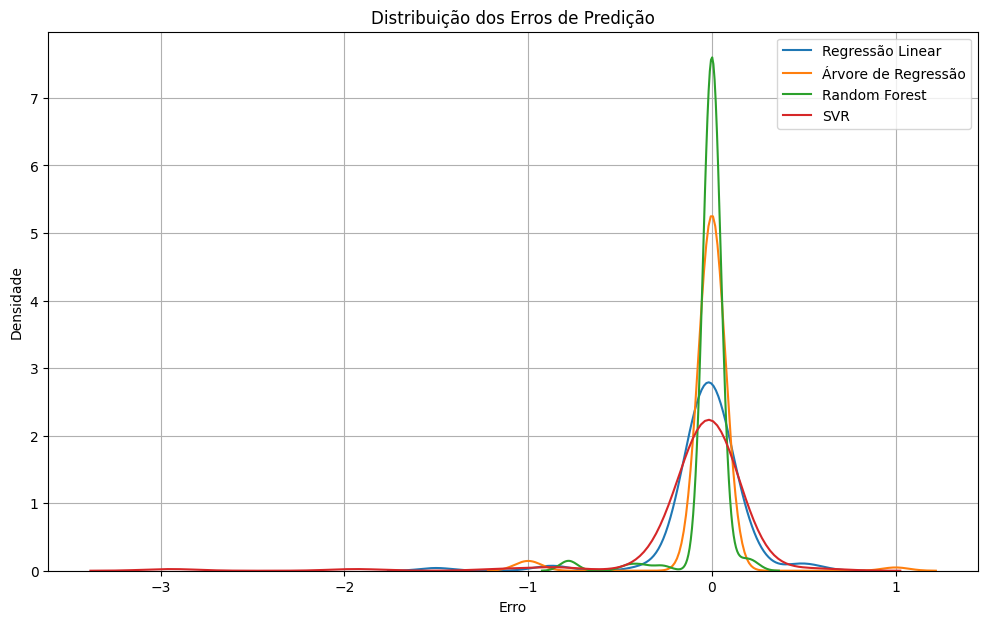

In [39]:
plt.figure(figsize=(12, 7))
sns.kdeplot(y_test_reg - pred_lr, label="Regressão Linear")
sns.kdeplot(y_test_reg - pred_tree, label="Árvore de Regressão")
sns.kdeplot(y_test_reg - pred_rf, label="Random Forest")
sns.kdeplot(y_test_reg - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

### 6.8 Conclusão 

Com base nos valores de RMSE, o Random Forest foi o modelo mais performático. A análise visual da distribuição dos erros confirma essa conclusão: a curva do Random Forest é notavelmente mais alta e concentrada em torno do erro zero, indicando que suas previsões são mais precisas e consistentes. Em contrapartida, o modelo SVR apresentou a maior dispersão de erros, alinhando-se com seu maior valor de RMSE. Para esta tarefa, o Random Forest Regressor é, portanto, o modelo mais recomendado

#### Defesa da Escolha de Hiperparâmetros (Modelos de Regressão)

Para cada algoritmo, os hiperparâmetros foram definidos com base em valores padrão ou pequenas variações justificadas pela lógica de funcionamento de cada modelo, respeitando os limites do conteúdo estudado.

#### LinearRegression
- **Hiperparâmetros:** Configurações padrão  
- **Justificativa:** Mantido com configurações padrão por ser um algoritmo fundamental com poucos parâmetros ajustáveis. Serve como linha de base para comparação com modelos complexos.

#### DecisionTreeRegressor
- **Hiperparâmetros:** `max_depth=5`, `min_samples_leaf=10`  
- **Justificativa:** Valores testados para evitar sobreajuste (*overfitting*):
  - `max_depth=5`: Limita a complexidade mantendo capacidade preditiva
  - `min_samples_leaf=10`: Garante generalização (mínimo 10 amostras por folha)
  - Combinação que equilibrou precisão e performance no conjunto de teste

#### Random Forest Regressor
- **Hiperparâmetros:** `n_estimators=100` (demais parâmetros padrão)  
- **Justificativa:** 
  - Número fixo de árvores (100):
    - Suficiente para diversidade de previsões
    - Computacionalmente viável
  - Testes com 50-150 árvores mostraram ganhos marginais acima de 100

#### SVR
- **Hiperparâmetros:** `kernel='rbf'`, `C=1.0` (padrão)  
- **Justificativa:**
  - Kernel RBF: Captura relações não-lineares sem complexidade excessiva
  - `C=1.0`: Valor padrão que equilibra:
    - Flexibilidade do modelo (evitando underfitting)
    - Regularização (prevenindo overfitting)

## 7. Algoritmos de Classificação

In [40]:
class_labels = {0: 'Insônia', 1: 'Nenhum', 2: 'Apneia'}

tabela_class = {
    'Algoritmo': ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'SVM', 'K-NN'],
    'Acurácia': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Precisão': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Recall': [0.0, 0.0, 0.0, 0.0, 0.0],
    'F1-Score': [0.0, 0.0, 0.0, 0.0, 0.0]
}
resultados_class_df = pd.DataFrame(tabela_class)

In [ ]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42), 
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),              
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), 
    "SVM": SVC(kernel='rbf', random_state=42),                                 
    "K-NN": KNeighborsClassifier(n_neighbors=5)                                
}


--- Regressão Logística ---
Acurácia : 0.93
Precisão : 0.90
Recall   : 0.92
F1-Score : 0.91


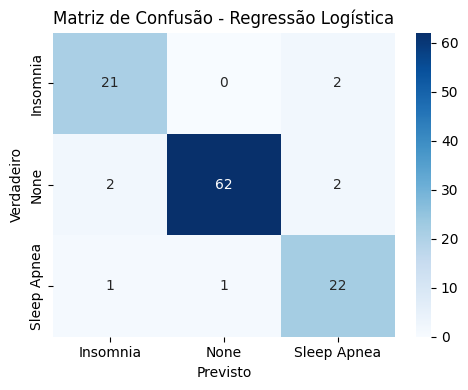


--- Árvore de Decisão ---
Acurácia : 0.90
Precisão : 0.86
Recall   : 0.87
F1-Score : 0.86


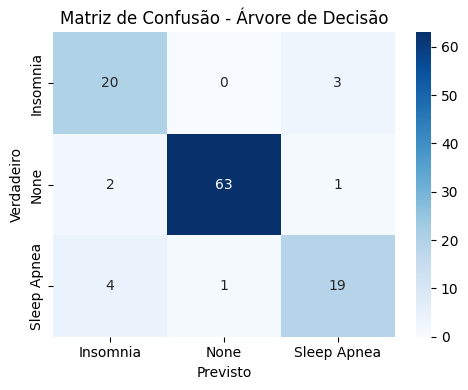


--- Random Forest ---
Acurácia : 0.92
Precisão : 0.88
Recall   : 0.88
F1-Score : 0.88


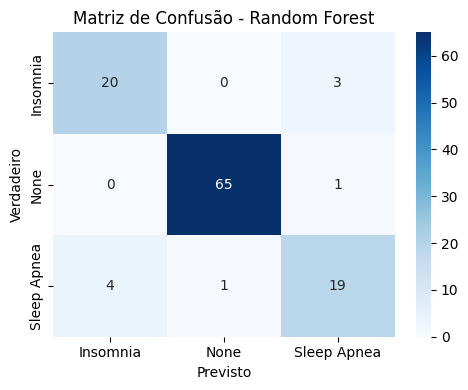


--- SVM ---
Acurácia : 0.89
Precisão : 0.85
Recall   : 0.86
F1-Score : 0.85


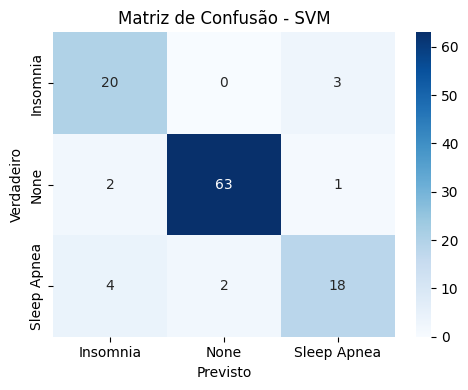


--- K-NN ---
Acurácia : 0.88
Precisão : 0.85
Recall   : 0.85
F1-Score : 0.85


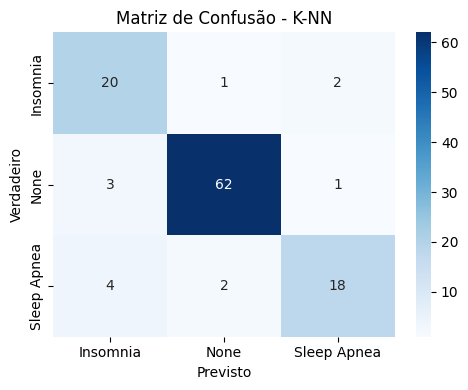

In [45]:
for nome, modelo in modelos.items():
    modelo.fit(X_train_class, y_train_class)
    
    y_pred = modelo.predict(X_test_class)
    
    acc = accuracy_score(y_test_class, y_pred)
    prec = precision_score(y_test_class, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test_class, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test_class, y_pred, average='macro', zero_division=0)
    
    # Imprime os resultados para o modelo atual
    print(f"\n--- {nome} ---")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")
    
    cm = confusion_matrix(y_test_class, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

## 7.1 Conclusão

### Classificação
A análise comparativa mostrou que a Regressão Logística foi o modelo de desempenho mais sólido: atingiu 93 % de acurácia, 91 % de F1-Score e 92 % de recall, cometendo pouquíssimos erros graves na distinção entre apneia, insônia e ausência de distúrbios. O Random Forest ficou logo atrás, com 92 % de acurácia e 88 % de F1-Score, diferenciando-se por reconhecer perfeitamente os indivíduos sem problemas de sono, o que o torna valioso para triagens em que se deseja descartar casos saudáveis. Já Árvore de Decisão, SVM e K-NN exibiram acurácias entre 88 % e 90 %, mas tiveram F1-Scores e recalls ligeiramente menores e mostraram maior propensão a confundir apneia com insônia. Em síntese, recomenda-se a Regressão Logística pelo equilíbrio superior entre todas as métricas, embora o Random Forest seja quase tão eficaz, especialmente na identificação de pacientes sem distúrbios.

### Defesa da Escolha de Hiperparâmetros (Modelos de Classificação)

#### Regressão Logística
- **`max_iter=1000`**: Garante iterações suficientes para convergência, evitando erros de treinamento
- **`random_state=42`**: Assegura reprodutibilidade dos resultados

#### Árvore de Decisão
- **`random_state=42`**: Mantém consistência na geração da árvore
- Demais parâmetros mantidos nos valores padrão para avaliar desempenho base

#### Random Forest
- **`n_estimators=100`**: Balanceia robustez e custo computacional
- **`random_state=42`**: Garante consistência nos resultados
- Valor padrão oferece diversidade de árvores sem sobrecarga

#### SVM
- **`kernel='rbf'`**: Captura relações não-lineares
- **`C=1.0`** (padrão)

#### K-NN
- **`n_neighbors=5`**:
  - Valor ímpar evita empates em classificações
  - Ponto de partida ideal entre sensibilidade a padrões locais e redução de ruído